In [2]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

(465, 453, 3)


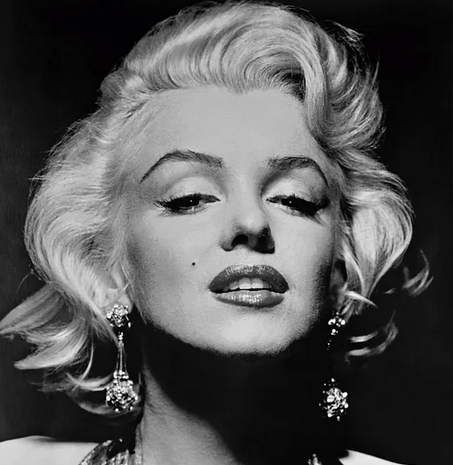

In [21]:
images = ["marilyn-monroe.png", "simpsons.png", "spiderman.jpg"]
index = 0
image = cv.imread(images[index])
print(image.shape)
cv2_imshow(image)

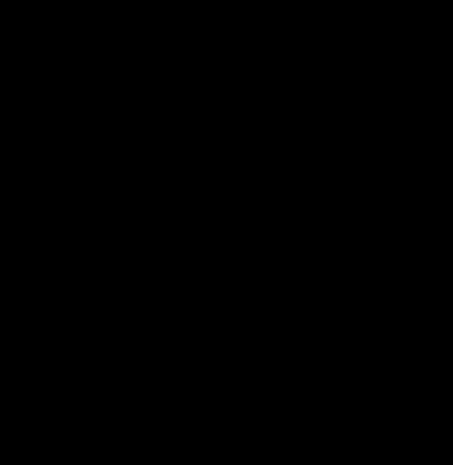

@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@%%##********##%%@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@%%##%%**++----====------**@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@%%####**==--::--++==------====++##@@@@%%@@@@@@@@@@@@@@@@@@@@@@
@@@@@@@@@@%%%%%%%%@@%%%%%%%%####**++--::====++++--------------++**%%%%**@@@@@@@@@@@@@@@@@@@@
@@@@@@@@@@%%%%##%%####%%%%##****==--==++++====--------------::++++**%%%%@@@@@@@@@@@@@@@@@@@@
@@@@@@@@@@@@@@%%@@@@@@@@%%**++==--====++==--==--------==++==----**==##@@@@@@@@@@@@@@@@@@@@@@
@@@@@@@@@@@@@@@@@@@@@@@@##==----==--------::----====--==****----++==**@@@@@@@@@@@@@@@@@@@@@@
@@@@@@@@@@@@@@@@@@@@@@****====++==--------====--======++##%%++::++==++##%%%%@@@@@@@@@@@@@@@@
@@@@@@@@@@@@@@@@@@@@##**==--==**++++----------======----++##++::++==******%%@@@@@@@@@@@@@@@@
@@@@@@@@@@@@@@@@@@@@##**====--==------::::::::----::::::--**++--**##********@@@@@@@@@@@@@@@@
@@@@@@@@@@@@@@@@@@@@##++--====------::::::::::::::::::::::--====**####

In [67]:
# create different brightness ascii chars string
ascii_chars = "$@B%8&WM#*oahkbdpqwmZO0QLCJUYXzcvunxrjft/\|()1{}[]?-_+~<>i!lI;:,^`'."
ascii_chars = "@%#*+=-:. "

char_size = (256 / len(ascii_chars))
pixel_size_for_char = 10

font = cv.FONT_HERSHEY_SIMPLEX
fontScale = 1
thickness = 2

# create a new image of the same as image to put ascii char on top of it
# new_image = np.zeros_like(image, dtype='int')
new_image = image.copy()
new_image.fill(0)

cv2_imshow(new_image)

# iterate over pixel image
for row in range(0, image.shape[0], pixel_size_for_char):
  for col in range(0, image.shape[1], pixel_size_for_char):
    pixel_batch = image[row:row+pixel_size_for_char, col:col+pixel_size_for_char]
    # get average color in pixel_batch
    avg_pixel = np.average(pixel_batch)
    char2use = ascii_chars[int(avg_pixel / char_size)] * 2
    color2use = tuple(np.mean(pixel_batch, axis=(0, 1)).astype(np.uint8) )
    # print(color2use)
    # new_image = cv.putText(new_image, char2use, (col, row), font,
    #                fontScale, color2use, thickness, cv.LINE_AA)
    print(char2use, end='')
  print()


In [63]:
import cv2
import numpy as np

# ASCII characters used for mapping pixel intensities
ASCII_CHARS = "@%#*+=-:. "

# Function to map grayscale values to ASCII characters
def pixel_to_ascii(pixel_value):
    return ASCII_CHARS[int(pixel_value / 256 * len(ASCII_CHARS))]

def convert_image_to_ascii(image_path, output_width=100):
    # Load the image
    image = cv2.imread(image_path)

    # Resize the image based on the desired output width
    height, width, _ = image.shape
    aspect_ratio = height / width
    new_height = int(output_width * aspect_ratio * 0.5)  # Adjust height for ASCII aspect ratio
    resized_image = cv2.resize(image, (output_width, new_height))

    # Convert the resized image to grayscale for intensity mapping
    gray_image = cv2.cvtColor(resized_image, cv2.COLOR_BGR2GRAY)

    # Create a blank canvas for ASCII art
    ascii_art = []

    # Generate ASCII art with color
    for y in range(new_height):
        line = []
        for x in range(output_width):
            pixel_gray = gray_image[y, x]
            ascii_char = pixel_to_ascii(pixel_gray)
            color = resized_image[y, x]  # Get the original color in BGR format
            # Convert BGR to RGB and add it to the character
            colored_char = f'\033[38;2;{color[2]};{color[1]};{color[0]}m{ascii_char}\033[0m'
            line.append(colored_char)
        ascii_art.append("".join(line))

    # Print the ASCII art
    print("\n".join(ascii_art))

# Example usage
convert_image_to_ascii(images[index])


@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@%##*#++***#%%*%%@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@*#%#@%***==----==--------*%@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@*#%%#**++=-::::-=++=-===-----===+*@@@@@%@@@@@@@@@@@@@@@@@@@@@@@@@
@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@%%****+--::::=-=++=*+=--:-:::::-==-=++*@@@@@+*@@@@@@@@@@@@@@@@@@@@@
@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@****+*--::--=+*=+==+=-:------=-=---:-:+#*-*@@%%+%@@@@@@@@@@@@@@@@@@@@
@@@@@@@@@@@@@@@@@@@@@@@@@@@@@***+*+=--====++*==::+----:-----====---:--##=:#%%@@%@@@@@@@@@@@@@@@@@@@@
@@@@@@@@@@@@@@@@@@@@@@@@@@@#**===---====-===-:-:=---:-=-+=::-==++=-----#+-=#*@*@@@@@@@@@@@@@@@@@@@@@
@@@@@@@@@@@@@@@@@@@@@@@@@%##+=----===---:-:-:-:------=+-=-+=++#%#%*::-:++-=:*@*@@%@%@@@@@@@@@@@@@@@@
@@@@@@@@@@@@@@@@@@@@@@@***+*+=:+=+=*=*====-=====-==-=----=-+-+#@@@@:-:-=*=:-*%*#%##@@@@@@@@@@@@@@@@@
@@@@@@@@@@@@@@@@@@@@@@****==:---++++++=+-------:---=======--=--=*##+:::+#=+*%***+*%%@@@@@@@